# Project Title:
## Customer Attrition Prediction

###

# Project Scenario : 
### Create a model to predict whether or not a customer will churn .

##

# Project Description:
### Customer Attrition Prediction:
#### Customer attrition or churn, is when customers stop doing business with a company. It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.
#### We are going to build a basic model for predicting customer churn using  verizonet_dataset(Verizonet, a telecommunications company based            in California). We are using some classification algorithm to model customers who have left, using Python tools such as numpy,pandas for data manipulation and matplotlib,seaborn for visualizations.

#

# Steps Involved to Predict Customer Attrition:
#### 1) Importing Libraries
#### 2) Loading Dataset
#### 3) Exploratory Data Analysis(EDA)
#### 4) Feature Selection
#### 5) Encoding Categorical Data 
#### 6) Splitting the Dataset
#### 7) Feature Scaling
#### 8) Mechine Learning Model
##### ---Prediction using Logistic Regression
##### ---Prediction using Decision Tree Classifier 
##### ---Prediction using Random Forest Classifier
##### ---Prediction using Support Vector Classifier

#

### Step1-Importing Libraries

In [1]:
#  Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step2-Loading Dataset

In [2]:
df=pd.read_csv("verizonet_data.csv")

### Step3-Exploratory Data Analysis(EDA)

In [3]:
df.shape

(7043, 43)

In [4]:
df.head()

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                No                    0                 1   
1  7495-OOKFY               Yes                    1                 8   
2  1658-BYGOY                No                    0                18   
3  4598-XLKNJ               Yes                    1                25   
4  4846-WHAFZ               Yes                    1                37   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0      NaN            No                               0.00             No   
1  Offer E           Yes                              48.85            Yes   
2  Offer D           Yes                              11.33            Yes   
3  Offer C           Yes                              19.76             No   
4  Offer C           Yes                               6.33            Yes   

  Internet Service Internet Type  ...         City Zip Code Population  \
0              Yes   Fiber Optic  ...  Los Angeles    90022      68701   
1              Yes         Cable  ...  Los Angeles    90063      55668   
2              Yes   Fiber Optic  ...  Los Angeles    90065      47534   
3              Yes   Fiber Optic  ...    Inglewood    90303      27778   
4              Yes         Cable  ...     Whittier    90602      26265   

  Churn Status  CLTV   Churn Category                  Churn Reason  \
0            1  5433       Competitor  Competitor offered more data   
1            1  5302       Competitor  Competitor made better offer   
2            1  3179       Competitor  Competitor made better offer   
3            1  5337  Dissatisfaction     Limited range of services   
4            1  2793            Price            Extra data charges   

  Total Customer Svc Requests Product/Service Issues Reported  \
0                           5                               0   
1                           5                               0   
2                           1                               0   
3                           1                               1   
4                           1                               0   

  Customer Satisfaction rate  
0                        NaN  
1                        NaN  
2                        NaN  
3                        2.0  
4                        2.0  

[5 rows x 43 columns]

In [5]:
df.tail()

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
7038  2569-WGERO                No                    0                72   
7039  6840-RESVB               Yes                    1                24   
7040  2234-XADUH               Yes                    4                72   
7041  4801-JZAZL               Yes                    1                11   
7042  3186-AJIEK                No                    0                66   

        Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
7038      NaN           Yes                              22.77             No   
7039  Offer C           Yes                              36.05            Yes   
7040      NaN           Yes                              29.66            Yes   
7041      NaN            No                               0.00             No   
7042      NaN           Yes                              30.96             No   

     Internet Service Internet Type  ...          City Zip Code Population  \
7038               No           NaN  ...       Landers    92285       2182   
7039              Yes           DSL  ...      Adelanto    92301      18980   
7040              Yes         Cable  ...         Amboy    92304         42   
7041              Yes           DSL  ...  Angelus Oaks    92305        301   
7042              Yes   Fiber Optic  ...  Apple Valley    92308      28819   

     Churn Status  CLTV Churn Category Churn Reason  \
7038            0  5306            NaN          NaN   
7039            0  2140            NaN          NaN   
7040            0  5560            NaN          NaN   
7041            0  2793            NaN          NaN   
7042            0  5097            NaN          NaN   

     Total Customer Svc Requests Product/Service Issues Reported  \
7038                           0                               0   
7039                           2                               0   
7040                           2                               0   
7041                           0                               0   
7042                           1                               2   

     Customer Satisfaction rate  
7038                        NaN  
7039                        NaN  
7040                        4.0  
7041                        NaN  
7042                        NaN  

[5 rows x 43 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [7]:
df.describe()    #  statistical summary of numerical data

Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                21.110890   
std                            15.448113                20.948471   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                28.000000   
max                            49.990000                94.000000   

       Monthly Charge  Total Regular Charges  Total Refunds  \
count     7043.000000            7043.000000    7043.000000   
mean        65.538800            2280.381264       1.962182   
std         30.606805            2266.220462       7.902614   
min         18.250000              18.800000       0.000000   
25%         35.890000             400.150000       0.000000   
50%         71.968000            1394.550000       0.000000   
75%         90.650000            3786.600000       0.000000   
max        123.084000            8684.800000      49.790000   

       Total Extra Data Charges  Total Long Distance Charges          Age  \
count               7043.000000                  7043.000000  7043.000000   
mean                 278.499225                   749.099262    46.509726   
std                  685.039625                   846.660055    16.750352   
min                    0.000000                     0.000000    19.000000   
25%                    0.000000                    70.545000    32.000000   
50%                    0.000000                   401.440000    46.000000   
75%                  182.620000                  1191.100000    60.000000   
max                 6477.000000                  3564.720000    80.000000   

           Zip Code     Population  Churn Status         CLTV  \
count   7043.000000    7043.000000   7043.000000  7043.000000   
mean   93486.070567   22139.603294      0.265370  4400.295755   
std     1856.767505   21152.392837      0.441561  1183.057152   
min    90001.000000      11.000000      0.000000  2003.000000   
25%    92101.000000    2344.000000      0.000000  3469.000000   
50%    93518.000000   17554.000000      0.000000  4527.000000   
75%    95329.000000   36125.000000      1.000000  5380.500000   
max    96150.000000  105285.000000      1.000000  6500.000000   

       Total Customer Svc Requests  Product/Service Issues Reported  \
count                  7043.000000                      7043.000000   
mean                      1.338776                         0.308107   
std                       1.430471                         0.717514   
min                       0.000000                         0.000000   
25%                       0.000000                         0.000000   
50%                       1.000000                         0.000000   
75%                       2.000000                         0.000000   
max                       9.000000                         6.000000   

       Customer Satisfaction rate  
count                 1834.000000  
mean                     3.005453  
std                      1.256938  
min                      1.000000  
25%                      2.000000  
50%                      3.000000  
75%                      4.000000  
max                      5.000000

In [8]:
df.columns        # showing all features 

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Zip Code',
       'Population', 'Churn Status', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'],
      dtype='object')

In [9]:
df.nunique()

Customer ID                          7043
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                63
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                          3
Monthly Charge                       2295
Total Regular Charges             

In [10]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].nunique())
    print("--------------------------------------------")
    print(df[column].unique())
    print("--------------------------------------------")
    print(df[column].value_counts())
    print("--------------------------------------------")
    print(df[column].count())
    print("\n\n\n")

Column: Customer ID
7043
--------------------------------------------
['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
--------------------------------------------
Customer ID
8779-QRDMV    1
9817-APLHW    1
5447-VYTKW    1
8871-JLMHM    1
7029-IJEJK    1
             ..
5493-SDRDQ    1
9249-FXSCK    1
3063-QFSZL    1
8364-TRMMK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
--------------------------------------------
7043




Column: Referred a Friend
2
--------------------------------------------
['No' 'Yes']
--------------------------------------------
Referred a Friend
No     3821
Yes    3222
Name: count, dtype: int64
--------------------------------------------
7043




Column: Number of Referrals
12
--------------------------------------------
[ 0  1  6  2  4  3  7  5  8  9 10 11]
--------------------------------------------
Number of Referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      23

In [11]:
df.duplicated().sum()

0

##### Any duplicate raws are not exist here.

In [12]:
df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

#### Some features showing huge no.of missing values. So we can replace null values with other values

In [13]:
# Replace NaN with 'None' in 'Offer'
df['Offer'].fillna('None', inplace=True)

# Replace NaN with 'Unknown' in 'Internet Type'
df['Internet Type'].fillna('Unknown', inplace=True)

# Replace NaN with 'Other' in 'Churn Category'
df['Churn Category'].fillna('Other', inplace=True)

# Replace NaN with 'Other' in 'Churn Reason'
df['Churn Reason'].fillna('Other', inplace=True)

# Replace NaN with 'Not Rated' in 'Customer Satisfaction rate'
df['Customer Satisfaction rate'] = df['Customer Satisfaction rate'].astype('object')
df['Customer Satisfaction rate'].fillna('Not Rated', inplace=True)

In [14]:
df.isnull().sum()

Customer ID                          0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges 

In [15]:
df.dtypes

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

#### There are 7043 customers in the dataset and 41 features without customerID (non-informative) and Churn Status column (target variable).
#### We have 2 types of features in the dataset: categorical and numerical. 
#### To obtain numeric and categorical columns separately from a dataset based on the datatype.

In [16]:
# identify catotegorical features 
categorical_columns = df.select_dtypes(include=['object']).columns   
print(categorical_columns)

Index(['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'City', 'Churn Category', 'Churn Reason',
       'Customer Satisfaction rate'],
      dtype='object')


In [17]:
# identify numerical features 
numerical_columns=df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Regular Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges', 'Age',
       'Zip Code', 'Population', 'Churn Status', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported'],
      dtype='object')


In [18]:
categorical_features=['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 
       'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',  'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category','Churn Reason', 'Customer Satisfaction rate']

numerical_features=['Number of Referrals', 'Tenure in Months','Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Regular Charges', 'Total Refunds','Total Extra Data Charges', 'Total Long Distance Charges', 'Age',
       'Zip Code', 'Population', 'CLTV','Total Customer Svc Requests', 'Product/Service Issues Reported']

target=['Churn Status']

### EDA based on Target Variable

In [19]:
churned_count=df["Churn Status"].value_counts()
churned_count

Churn Status
0    5174
1    1869
Name: count, dtype: int64

##### From the above a total of 1869 customers churned.

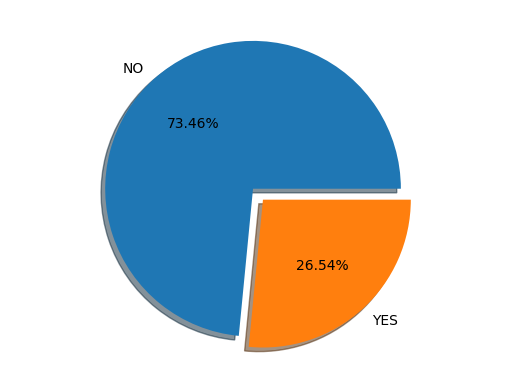

In [20]:
plt.axis("equal")
plt.pie(churned_count,labels=["NO","YES"], shadow=True, autopct='%1.2f%%',radius=1,explode=[0.05,0.05])
plt.show()

##### The churn rate is 26.54%. This is a significant percentage of customers, and it is important to understand why these customers are churning.
#####  A good or "acceptable" churn rate is from 2% to 8%

#### EDA based on Churn Category & Churn Reason

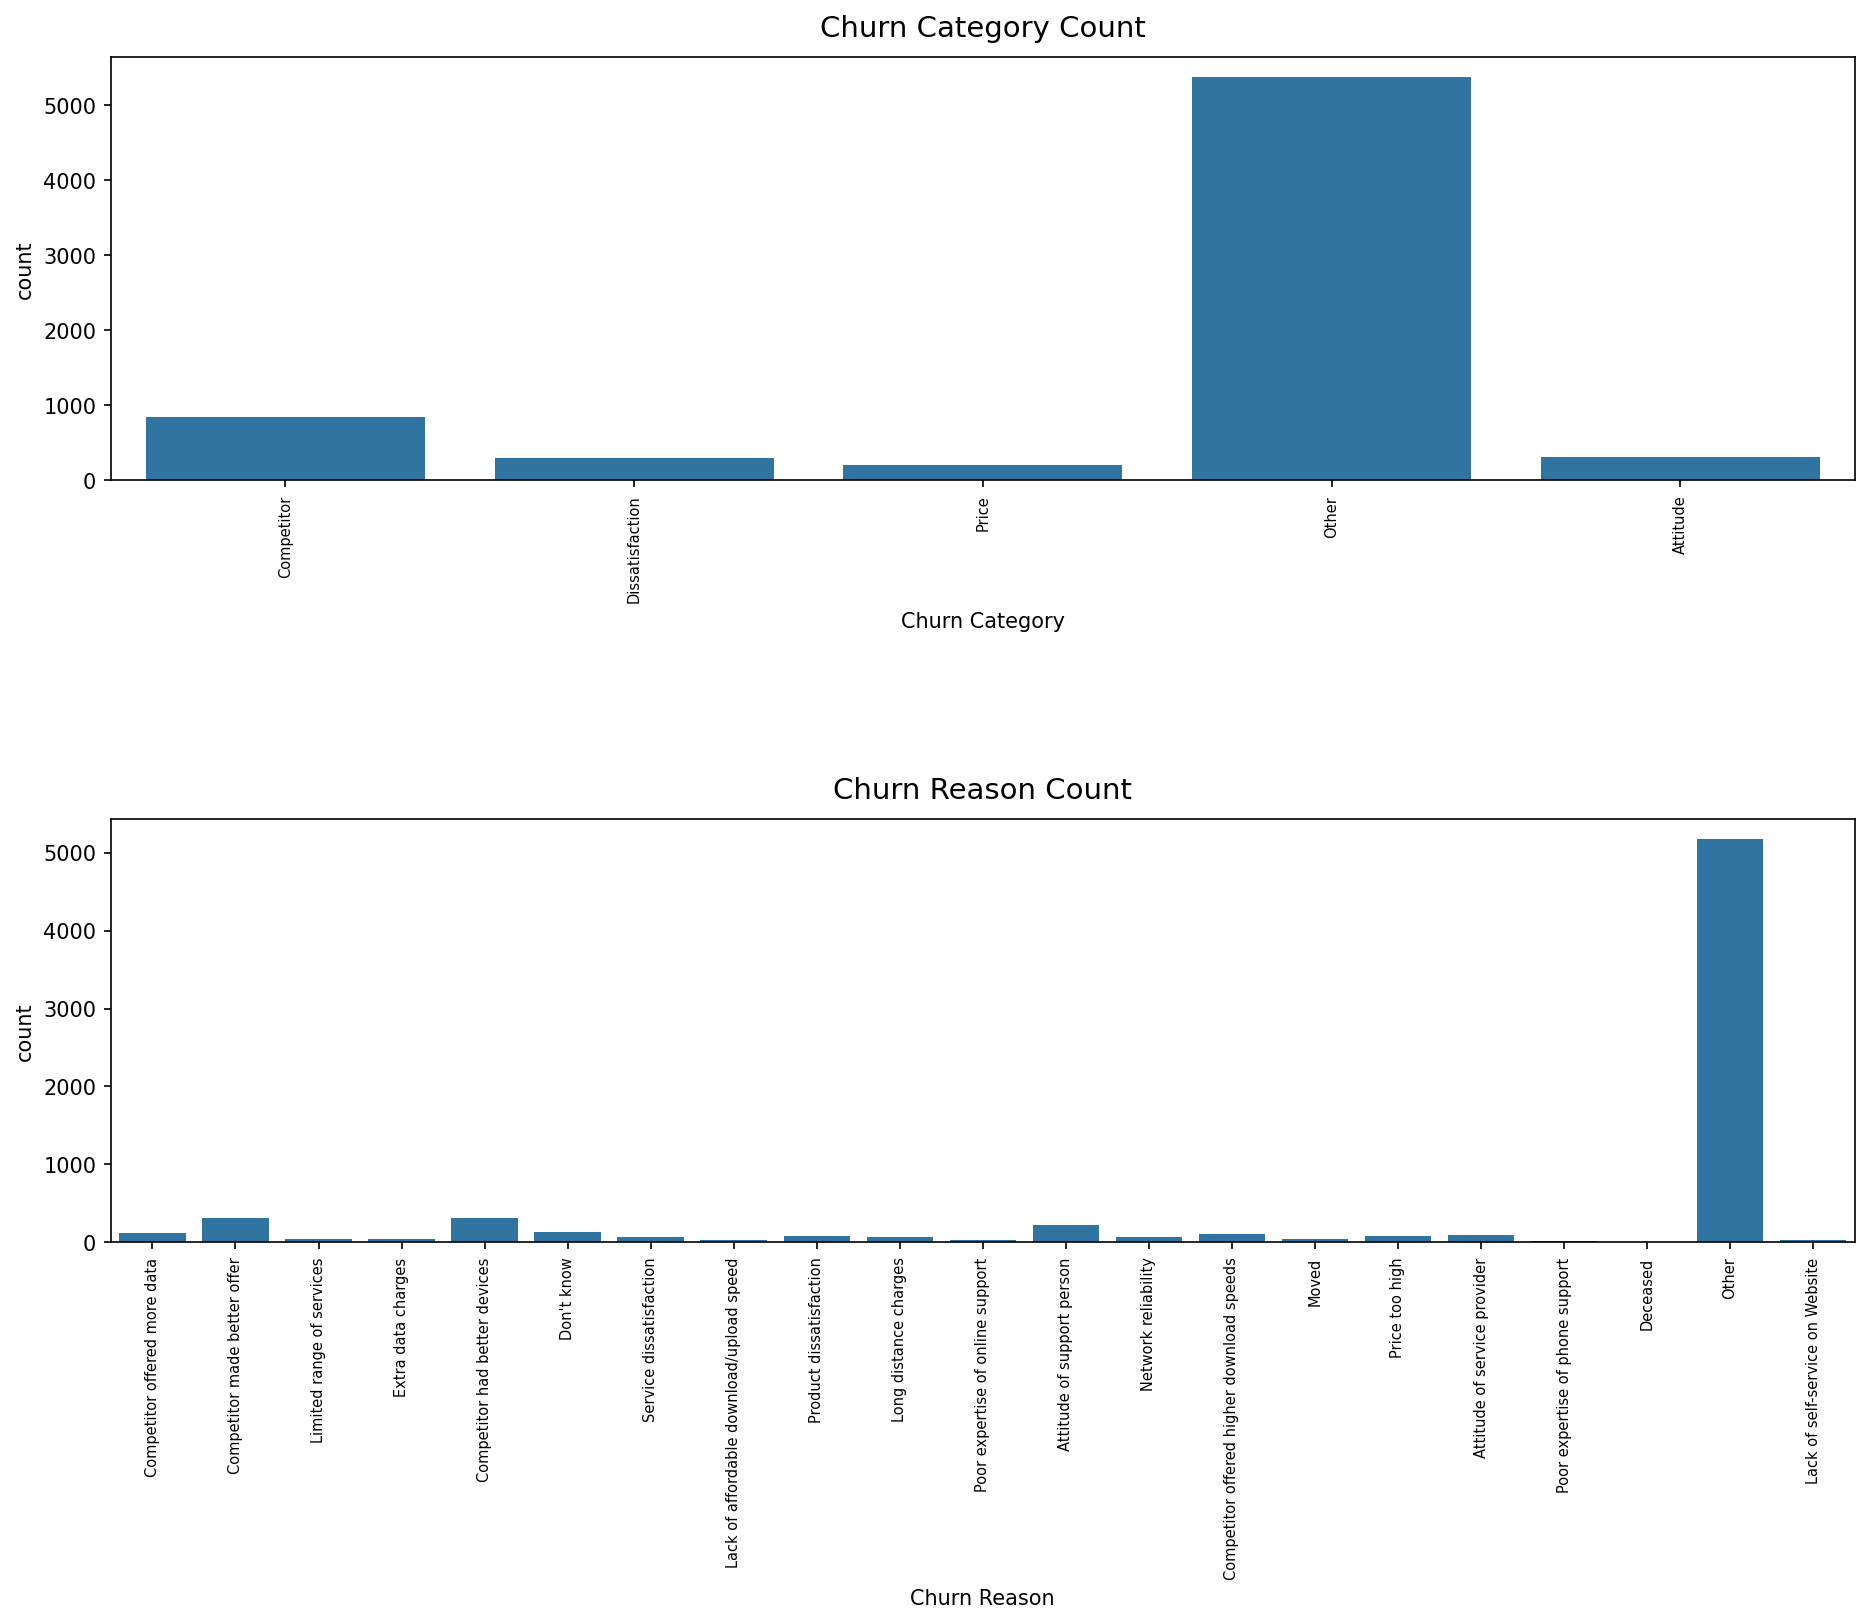

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), dpi=150)

sns.countplot(ax=axes[0], data=df, x='Churn Category')
axes[0].set_title('Churn Category Count', fontsize=14, pad=10)
axes[0].tick_params(axis='x', rotation=90, labelsize=7)

sns.countplot(ax=axes[1], data=df, x='Churn Reason')
axes[1].set_title('Churn Reason Count', fontsize=14, pad=10)
axes[1].tick_params(axis='x', rotation=90, labelsize=7)

plt.subplots_adjust(top=0.9, hspace=0.8)

plt.show()

<Axes: xlabel='Customer Satisfaction rate', ylabel='count'>

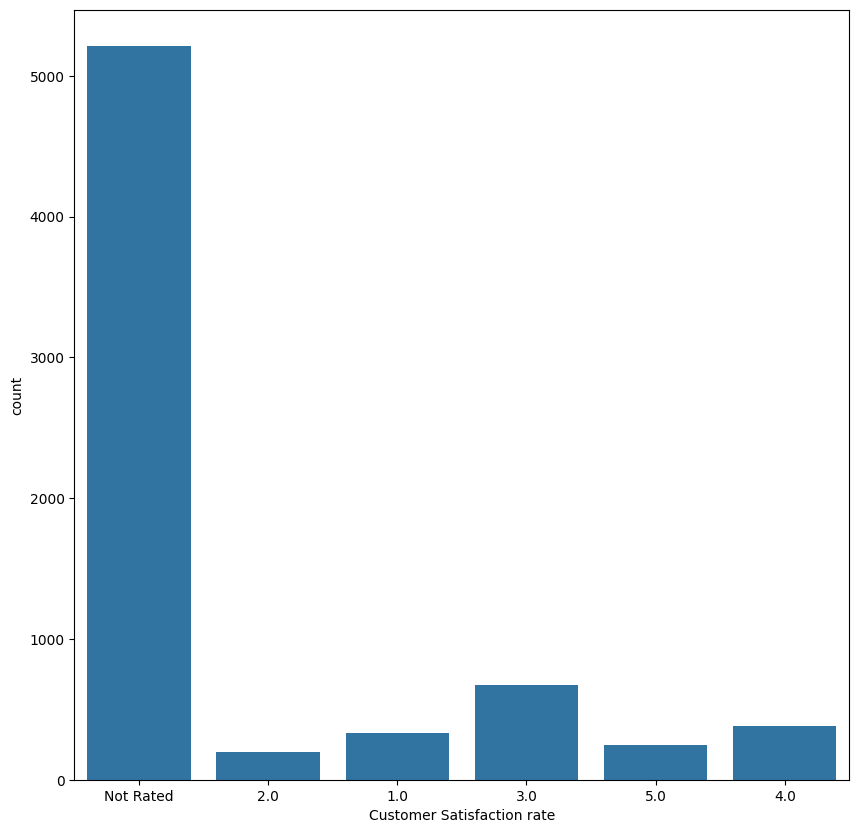

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x='Customer Satisfaction rate',data=df)

##### From the above plots not showing exact reasons for churning.

### EDA based on all other categorical features

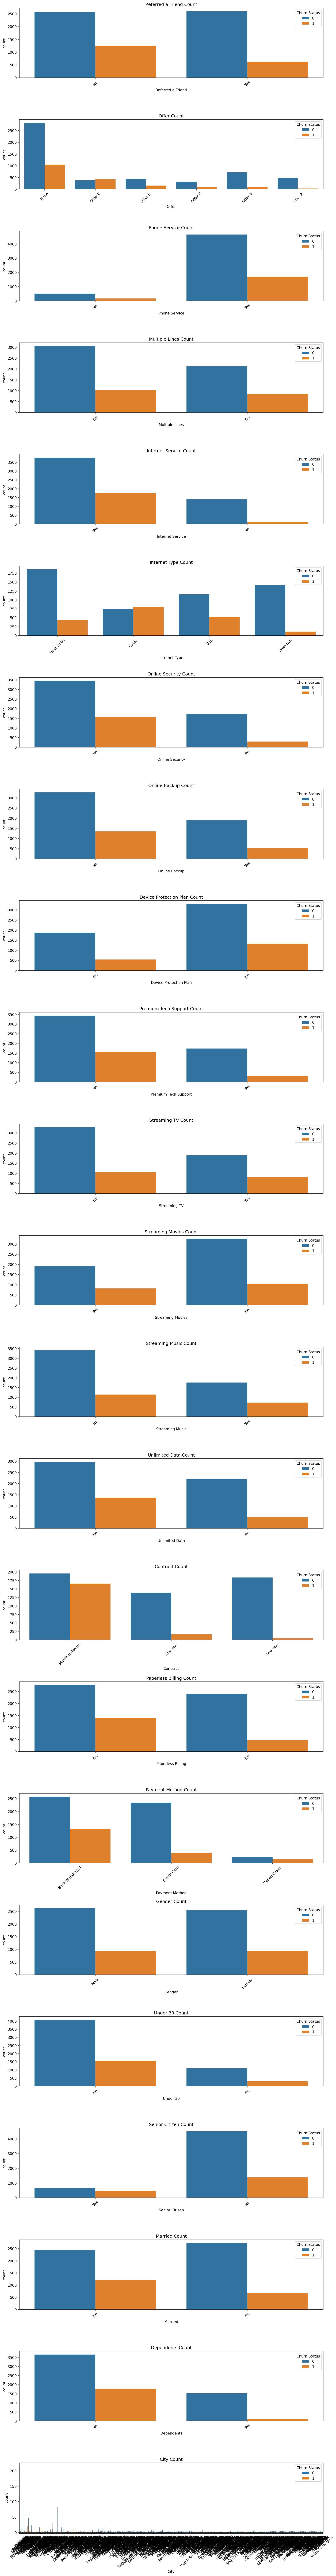

In [23]:

# Define the categorical features
categorical_features_1=['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 
       'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',  'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City']

# Set up the subplots
fig, axes = plt.subplots(len(categorical_features_1), 1, figsize=(15, 5 * len(categorical_features_1)), dpi=150)

# Iterate through each categorical feature and create a bar plot
for i, feature in enumerate(categorical_features_1):
    sns.countplot(ax=axes[i], data=df, x=feature,hue="Churn Status")
    axes[i].set_title(f'{feature} Count')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

# Adjusting layout
plt.subplots_adjust(top=0.95, hspace=0.6)

plt.show()

#### Interpretation based on all categorical features:

##### From referrals by friends, a higher number tends to result in a lower churn rate.
##### Customers with phone service there and Internet service is a high churn rate
##### Customers without multiple lines tend to stay with the company longer.
##### Customers without Online Security,Online Backup,Device Protection Plan and Premium Tech Support tend to high churn rate.
##### In cases where unlimited data is low, the churn rate is high
##### In the case of internet types, customers with cable connections have experienced higher churn rates, suggesting that something may be wrong with the cable connection.
##### Customers who do not stream movies, music, and TV have a higher churn rate.
##### Customers with papperless billing method show high chun rate.
##### From the chart, we realized that customers with automated forms of payment, such as credit cards and mailed checks, had the lowest churn rate compared to bank withdrawals.
##### The churn rate is not affected by gender in this case.
##### In the dataset, we can see that most of the people are senior citizens.
##### Customers who are married and have dependents show a low churn rate.
##### When the contract period is month-to-month, the churn rate is higher compared to one year and two years.
##### The count of offers and cities does not have any effect on the churn rate.


##

### EDA based on all numerical features

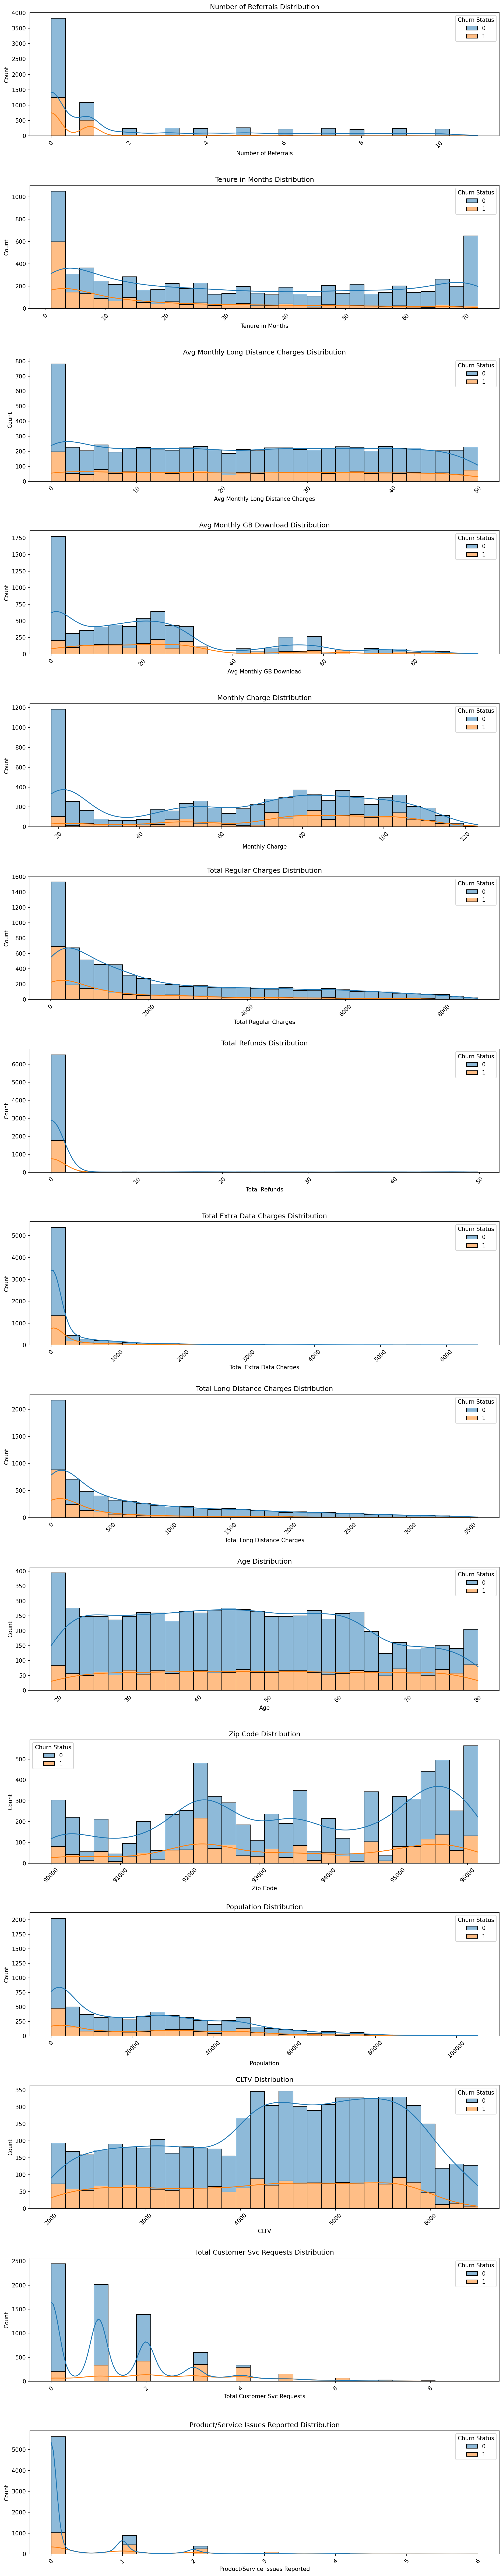

In [24]:
# Define the numerical features
numerical_features=['Number of Referrals', 'Tenure in Months','Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Regular Charges', 'Total Refunds','Total Extra Data Charges', 'Total Long Distance Charges', 'Age',
       'Zip Code', 'Population', 'CLTV','Total Customer Svc Requests', 'Product/Service Issues Reported']

# Set up the subplots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(15, 5 * len(numerical_features)), dpi=150)

# Iterate through each numerical feature and create a histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(ax=axes[i], data=df, x=feature, hue="Churn Status", kde=True, bins=30, multiple="stack")
    axes[i].set_title(f'{feature} Distribution')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

# Adjusting layout
plt.subplots_adjust(top=0.95, hspace=0.4)

plt.show()


#### Interpretation based on all numerical features:

##### In the case of monthly charges, we can see that in some instances, they have led to customer churn
##### In the case of total regular charge, we observe that a low charge has led to customer churn.
##### When the tenure period is shorter, the churn rate is higher. of dependable substitutes

##

### Exploring the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot

<Axes: xlabel='Churn Status', ylabel='Total Regular Charges'>

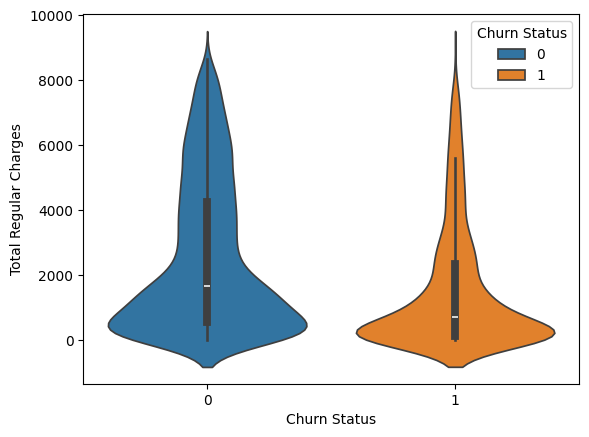

In [25]:
sns.violinplot(data=df,x='Churn Status',y='Total Regular Charges',hue='Churn Status')

##### Most customers have a total regular charge below 2000. Also we observe that a low charge has led to customer churn.

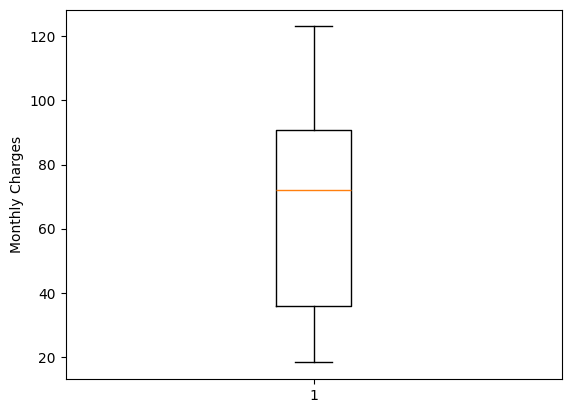

In [26]:
# Create a box plot of the MonthlyCharges column
plt.boxplot(df['Monthly Charge' ])
plt.ylabel('Monthly Charges')
plt.show()

#### The average monthly charge is 70.

In [27]:
df["Monthly Charge"].describe()

count    7043.000000
mean       65.538800
std        30.606805
min        18.250000
25%        35.890000
50%        71.968000
75%        90.650000
max       123.084000
Name: Monthly Charge, dtype: float64

<Axes: xlabel='Churn Status', ylabel='Monthly Charge'>

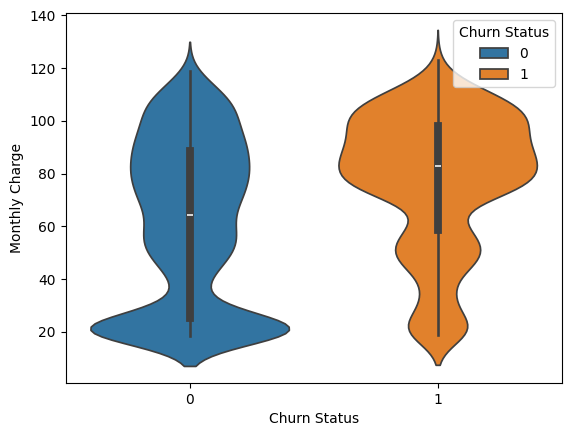

In [28]:
sns.violinplot(data=df,x='Churn Status',y='Monthly Charge',hue='Churn Status')

##### In the case of monthly charges, we can see that in some instances, they have led to customer churn
##### Most customers with a monthly charge between 60 and 150 experience a high churn rate

##

#### Lets see the relationship between Monthly charge and Total Charge and Customer Churn

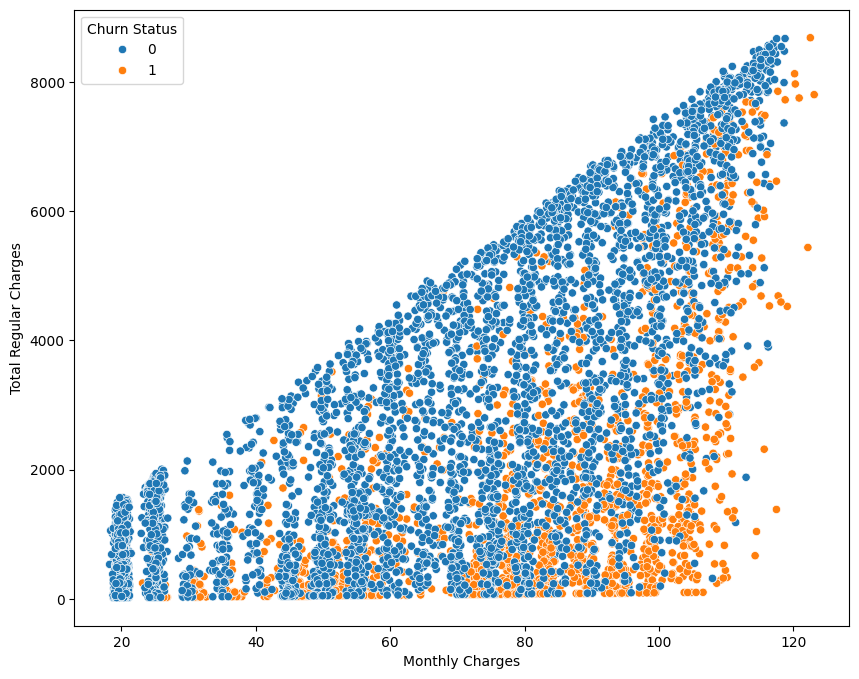

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Monthly Charge', y='Total Regular Charges', data=df, hue="Churn Status")
plt.xlabel('Monthly Charges')
plt.ylabel('Total Regular Charges')
plt.show()

##### From the scatter plot one could identify that lot more customers churned when their monthly bills were rising between 70 to about 105. However lot more customers stayed when their Total Charges were rather going high.

###

### Exploring the distrbution of contracts and tenure

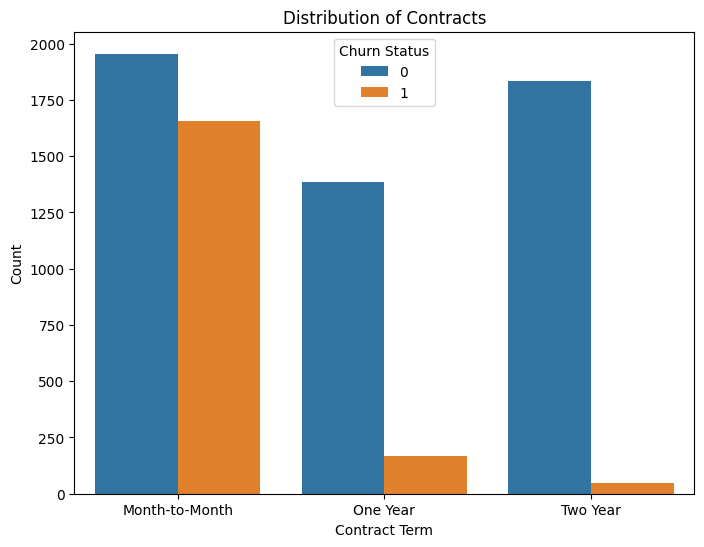

In [30]:
# Plot the distribution of the Contract column
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=df,hue='Churn Status')
plt.title('Distribution of Contracts')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.show()

##### We noticed that the longer the contract duration, the lower the churn rate. This might probably be due to the fact that customers pay more when they sign on to Monthly contracts.

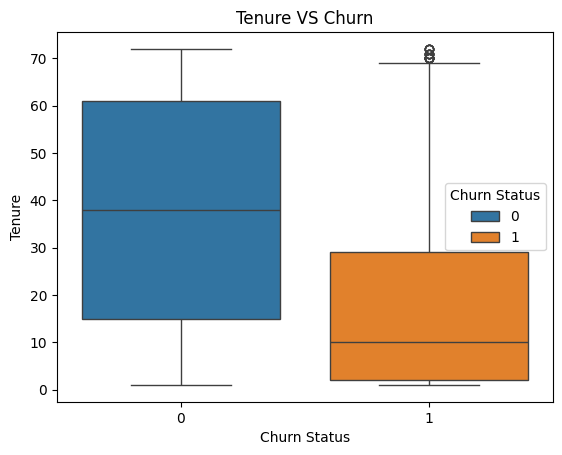

In [31]:
sns.boxplot(x='Churn Status', y='Tenure in Months', data=df,hue="Churn Status")
plt.title('Tenure VS Churn')
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.show()

##### From the boxplot, we can observe that most customers churned before reaching their 40th month. This should be critically examined.

###

#### Creating Cohorts based on Tenure
###### Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.¶

##### Calculating the Churn rate (percentage that had Yes Churn) per cohort.

In [32]:
yes_churn = df.groupby(['Churn Status','Tenure in Months']).count().transpose()[1]
yes_churn

Tenure in Months                    1    2   3   4   5   6   7   8   9   10  \
Customer ID                        380  123  94  83  64  40  51  42  46  45   
Referred a Friend                  380  123  94  83  64  40  51  42  46  45   
Number of Referrals                380  123  94  83  64  40  51  42  46  45   
Offer                              380  123  94  83  64  40  51  42  46  45   
Phone Service                      380  123  94  83  64  40  51  42  46  45   
Avg Monthly Long Distance Charges  380  123  94  83  64  40  51  42  46  45   
Multiple Lines                     380  123  94  83  64  40  51  42  46  45   
Internet Service                   380  123  94  83  64  40  51  42  46  45   
Internet Type                      380  123  94  83  64  40  51  42  46  45   
Avg Monthly GB Download            380  123  94  83  64  40  51  42  46  45   
Online Security                    380  123  94  83  64  40  51  42  46  45   
Online Backup                      380  123  94  83  64  40  51  42  46  45   
Device Protection Plan             380  123  94  83  64  40  51  42  46  45   
Premium Tech Support               380  123  94  83  64  40  51  42  46  45   
Streaming TV                       380  123  94  83  64  40  51  42  46  45   
Streaming Movies                   380  123  94  83  64  40  51  42  46  45   
Streaming Music                    380  123  94  83  64  40  51  42  46  45   
Unlimited Data                     380  123  94  83  64  40  51  42  46  45   
Contract                           380  123  94  83  64  40  51  42  46  45   
Paperless Billing                  380  123  94  83  64  40  51  42  46  45   
Payment Method                     380  123  94  83  64  40  51  42  46  45   
Monthly Charge                     380  123  94  83  64  40  51  42  46  45   
Total Regular Charges              380  123  94  83  64  40  51  42  46  45   
Total Refunds                      380  123  94  83  64  40  51  42  46  45   
Total Extra Data Charges           380  123  94  83  64  40  51  42  46  45   
Total Long Distance Charges        380  123  94  83  64  40  51  42  46  45   
Gender                             380  123  94  83  64  40  51  42  46  45   
Age                                380  123  94  83  64  40  51  42  46  45   
Under 30                           380  123  94  83  64  40  51  42  46  45   
Senior Citizen                     380  123  94  83  64  40  51  42  46  45   
Married                            380  123  94  83  64  40  51  42  46  45   
Dependents                         380  123  94  83  64  40  51  42  46  45   
City                               380  123  94  83  64  40  51  42  46  45   
Zip Code                           380  123  94  83  64  40  51  42  46  45   
Population                         380  123  94  83  64  40  51  42  46  45   
CLTV                               380  123  94  83  64  40  51  42  46  45   
Churn Category                     380  123  94  83  64  40  51  42  46  45   
Churn Reason                       380  123  94  83  64  40  51  42  46  45   
Total Customer Svc Requests        380  123  94  83  64  40  51  42  46  45   
Product/Service Issues Reported    380  123  94  83  64  40  51  42  46  45   
Customer Satisfaction rate         380  123  94  83  64  40  51  42  46  45   

Tenure in Months                   ...  63  64  65  66  67  68  69  70  71  72  
Customer ID                        ...   4   4   9  13  10   9   8  11   6   6  
Referred a Friend                  ...   4   4   9  13  10   9   8  11   6   6  
Number of Referrals                ...   4   4   9  13  10   9   8  11   6   6  
Offer                              ...   4   4   9  13  10   9   8  11   6   6  
Phone Service                      ...   4   4   9  13  10   9   8  11   6   6  
Avg Monthly Long Distance Charges  ...   4   4   9  13  10   9   8  11   6   6  
Multiple Lines                     ...   4   4   9  13  10   9   8  11   6   6  
Internet Service                 

In [33]:
no_churn = df.groupby(['Churn Status','Tenure in Months']).count().transpose()[0]
no_churn

Tenure in Months                    1    2    3   4   5   6   7   8   9   10  \
Customer ID                        233  115  106  93  69  70  80  81  73  82   
Referred a Friend                  233  115  106  93  69  70  80  81  73  82   
Number of Referrals                233  115  106  93  69  70  80  81  73  82   
Offer                              233  115  106  93  69  70  80  81  73  82   
Phone Service                      233  115  106  93  69  70  80  81  73  82   
Avg Monthly Long Distance Charges  233  115  106  93  69  70  80  81  73  82   
Multiple Lines                     233  115  106  93  69  70  80  81  73  82   
Internet Service                   233  115  106  93  69  70  80  81  73  82   
Internet Type                      233  115  106  93  69  70  80  81  73  82   
Avg Monthly GB Download            233  115  106  93  69  70  80  81  73  82   
Online Security                    233  115  106  93  69  70  80  81  73  82   
Online Backup                      233  115  106  93  69  70  80  81  73  82   
Device Protection Plan             233  115  106  93  69  70  80  81  73  82   
Premium Tech Support               233  115  106  93  69  70  80  81  73  82   
Streaming TV                       233  115  106  93  69  70  80  81  73  82   
Streaming Movies                   233  115  106  93  69  70  80  81  73  82   
Streaming Music                    233  115  106  93  69  70  80  81  73  82   
Unlimited Data                     233  115  106  93  69  70  80  81  73  82   
Contract                           233  115  106  93  69  70  80  81  73  82   
Paperless Billing                  233  115  106  93  69  70  80  81  73  82   
Payment Method                     233  115  106  93  69  70  80  81  73  82   
Monthly Charge                     233  115  106  93  69  70  80  81  73  82   
Total Regular Charges              233  115  106  93  69  70  80  81  73  82   
Total Refunds                      233  115  106  93  69  70  80  81  73  82   
Total Extra Data Charges           233  115  106  93  69  70  80  81  73  82   
Total Long Distance Charges        233  115  106  93  69  70  80  81  73  82   
Gender                             233  115  106  93  69  70  80  81  73  82   
Age                                233  115  106  93  69  70  80  81  73  82   
Under 30                           233  115  106  93  69  70  80  81  73  82   
Senior Citizen                     233  115  106  93  69  70  80  81  73  82   
Married                            233  115  106  93  69  70  80  81  73  82   
Dependents                         233  115  106  93  69  70  80  81  73  82   
City                               233  115  106  93  69  70  80  81  73  82   
Zip Code                           233  115  106  93  69  70  80  81  73  82   
Population                         233  115  106  93  69  70  80  81  73  82   
CLTV                               233  115  106  93  69  70  80  81  73  82   
Churn Category                     233  115  106  93  69  70  80  81  73  82   
Churn Reason                       233  115  106  93  69  70  80  81  73  82   
Total Customer Svc Requests        233  115  106  93  69  70  80  81  73  82   
Product/Service Issues Reported    233  115  106  93  69  70  80  81  73  82   
Customer Satisfaction rate         233  115  106  93  69  70  80  81  73  82   

Tenure in Months                   ...  63  64  65  66  67  68  69   70   71  \
Customer ID                        ...  68  76  67  76  88  91  87  108  164   
Referred a Friend                  ...  68  76  67  76  88  91  87  108  164   
Number of Referrals                ...  68  76  67  76  88  91  87  108  164   
Offer                              ...  68  76  67  76  88  91  87  108  164   
Phone Service                      ...  68  76  67  76  88  91  87  108  164   
Avg Monthly Long Distance Charges  ...  68  76  67  76  88  91  87  108  164   
Multiple Lines                     ...  68  76  67  76  88  91  87  108  164   

In [34]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)
churn_rate

Tenure in Months                          1          2     3          4   \
Customer ID                        61.990212  51.680672  47.0  47.159091   
Referred a Friend                  61.990212  51.680672  47.0  47.159091   
Number of Referrals                61.990212  51.680672  47.0  47.159091   
Offer                              61.990212  51.680672  47.0  47.159091   
Phone Service                      61.990212  51.680672  47.0  47.159091   
Avg Monthly Long Distance Charges  61.990212  51.680672  47.0  47.159091   
Multiple Lines                     61.990212  51.680672  47.0  47.159091   
Internet Service                   61.990212  51.680672  47.0  47.159091   
Internet Type                      61.990212  51.680672  47.0  47.159091   
Avg Monthly GB Download            61.990212  51.680672  47.0  47.159091   
Online Security                    61.990212  51.680672  47.0  47.159091   
Online Backup                      61.990212  51.680672  47.0  47.159091   
Device Protection Plan             61.990212  51.680672  47.0  47.159091   
Premium Tech Support               61.990212  51.680672  47.0  47.159091   
Streaming TV                       61.990212  51.680672  47.0  47.159091   
Streaming Movies                   61.990212  51.680672  47.0  47.159091   
Streaming Music                    61.990212  51.680672  47.0  47.159091   
Unlimited Data                     61.990212  51.680672  47.0  47.159091   
Contract                           61.990212  51.680672  47.0  47.159091   
Paperless Billing                  61.990212  51.680672  47.0  47.159091   
Payment Method                     61.990212  51.680672  47.0  47.159091   
Monthly Charge                     61.990212  51.680672  47.0  47.159091   
Total Regular Charges              61.990212  51.680672  47.0  47.159091   
Total Refunds                      61.990212  51.680672  47.0  47.159091   
Total Extra Data Charges           61.990212  51.680672  47.0  47.159091   
Total Long Distance Charges        61.990212  51.680672  47.0  47.159091   
Gender                             61.990212  51.680672  47.0  47.159091   
Age                                61.990212  51.680672  47.0  47.159091   
Under 30                           61.990212  51.680672  47.0  47.159091   
Senior Citizen                     61.990212  51.680672  47.0  47.159091   
Married                            61.990212  51.680672  47.0  47.159091   
Dependents                         61.990212  51.680672  47.0  47.159091   
City                               61.990212  51.680672  47.0  47.159091   
Zip Code                           61.990212  51.680672  47.0  47.159091   
Population                         61.990212  51.680672  47.0  47.159091   
CLTV                               61.990212  51.680672  47.0  47.159091   
Churn Category                     61.990212  51.680672  47.0  47.159091   
Churn Reason                       61.990212  51.680672  47.0  47.159091   
Total Customer Svc Requests        61.990212  51.680672  47.0  47.159091   
Product/Service Issues Reported    61.990212  51.680672  47.0  47.159091   
Customer Satisfaction rate         61.990212  51.680672  47.0  47.159091   

Tenure in Months                          5          6          7          8   \
Customer ID                        48.120301  36.363636  38.931298  34.146341   
Referred a Friend                  48.120301  36.363636  38.931298  34.146341   
Number of Referrals                48.120301  36.363636  38.931298  34.146341   
Offer                              48.120301  36.363636  38.931298  34.146341   
Phone Service                      48.120301  36.363636  38.931298  34.146341   
Avg Monthly Long Distance Charges  48.120301  36.363636  38.931298  34.146341   
Multiple Lines                     48.120301  36.363636  38.931298  34.146341   
Internet Service                   48.120301  36.363636  38.931298  34.146341   
Internet Type                      48.120301  36.363636  38.931298  34.146341 

In [35]:
churn_rate.transpose()

Customer ID  Referred a Friend  Number of Referrals  \
Tenure in Months                                                        
1                   61.990212          61.990212            61.990212   
2                   51.680672          51.680672            51.680672   
3                   47.000000          47.000000            47.000000   
4                   47.159091          47.159091            47.159091   
5                   48.120301          48.120301            48.120301   
...                       ...                ...                  ...   
68                   9.000000           9.000000             9.000000   
69                   8.421053           8.421053             8.421053   
70                   9.243697           9.243697             9.243697   
71                   3.529412           3.529412             3.529412   
72                   1.657459           1.657459             1.657459   

                      Offer  Phone Service  Avg Monthly Long Distance Charges  \
Tenure in Months                                                                
1                 61.990212      61.990212                          61.990212   
2                 51.680672      51.680672                          51.680672   
3                 47.000000      47.000000                          47.000000   
4                 47.159091      47.159091                          47.159091   
5                 48.120301      48.120301                          48.120301   
...                     ...            ...                                ...   
68                 9.000000       9.000000                           9.000000   
69                 8.421053       8.421053                           8.421053   
70                 9.243697       9.243697                           9.243697   
71                 3.529412       3.529412                           3.529412   
72                 1.657459       1.657459                           1.657459   

                  Multiple Lines  Internet Service  Internet Type  \
Tenure in Months                                                    
1                      61.990212         61.990212      61.990212   
2                      51.680672         51.680672      51.680672   
3                      47.000000         47.000000      47.000000   
4                      47.159091         47.159091      47.159091   
5                      48.120301         48.120301      48.120301   
...                          ...               ...            ...   
68                      9.000000          9.000000       9.000000   
69                      8.421053          8.421053       8.421053   
70                      9.243697          9.243697       9.243697   
71                      3.529412          3.529412       3.529412   
72                      1.657459          1.657459       1.657459   

                  Avg Monthly GB Download  ...  Dependents       City  \
Tenure in Months                           ...                          
1                               61.990212  ...   61.990212  61.990212   
2                               51.680672  ...   51.680672  51.680672   
3                               47.000000  ...   47.000000  47.000000   
4                               47.159091  ...   47.159091  47.159091   
5                               48.120301  ...   48.120301  48.120301   
...                                   ...  ...         ...        ...   
68                               9.000000  ...    9.000000   9.000000   
69                               8.421053  ...    8.421053   8.421053   
70                               9.243697  ...    9.243697   9.243697   
71                               3.529412  ...    3.529412   3.529412   
72                               1.657459  ...    1.657459   1.657459   

                   Zip Code  Population       CLTV  Churn Category  \
Tenure in Months                                                     
1                 61.99021

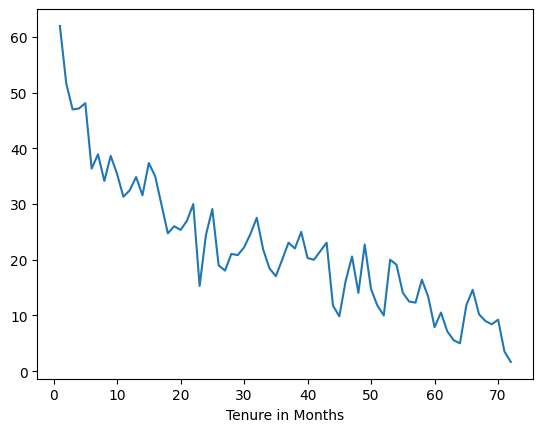

In [36]:
churn_rate.transpose()['Customer ID'].plot();

#### Customer churn rate decreases as tenure increases

######

### Broader Cohort Groups
#### Based on the tenure column values, creating a new column called Tenure Cohort that creates 4 separate categories:
#### '0-12 Months'
#### '12-24 Months'
#### '24-48 Months'
#### 'Over 48 Months'¶

In [37]:
# Define the cohort bins
bins = [0, 12, 24, 48, float('inf')]
labels = ['0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months']

# Create the 'Cohort' column using the cut function
df['Tenure Cohort'] = pd.cut(df['Tenure in Months'], bins=bins, labels=labels, right=False)

In [38]:
df[['Tenure in Months','Tenure Cohort']]

Tenure in Months   Tenure Cohort
0                    1     0-12 Months
1                    8     0-12 Months
2                   18    12-24 Months
3                   25    24-48 Months
4                   37    24-48 Months
...                ...             ...
7038                72  Over 48 Months
7039                24    24-48 Months
7040                72  Over 48 Months
7041                11     0-12 Months
7042                66  Over 48 Months

[7043 rows x 2 columns]

### Scatterplot of Total Charges versus Monthly Charts

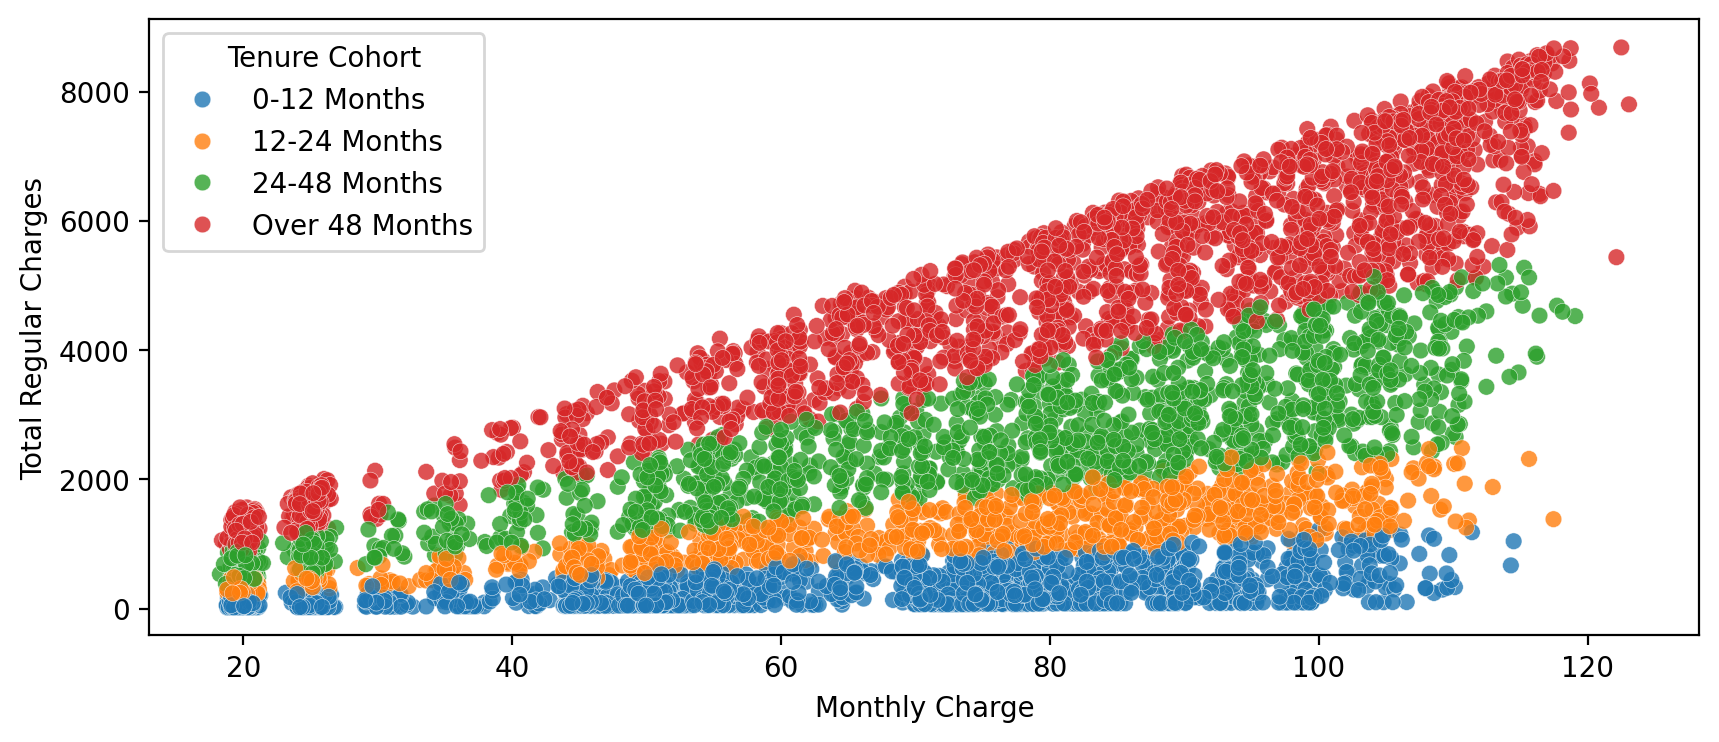

In [39]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='Monthly Charge',y='Total Regular Charges',hue='Tenure Cohort',linewidth=0.2,alpha=0.8);

##### Cohorts with longer tenures have the highest total charges.

###

### Count plot showing the churn count per cohort

<Axes: xlabel='Tenure Cohort', ylabel='count'>

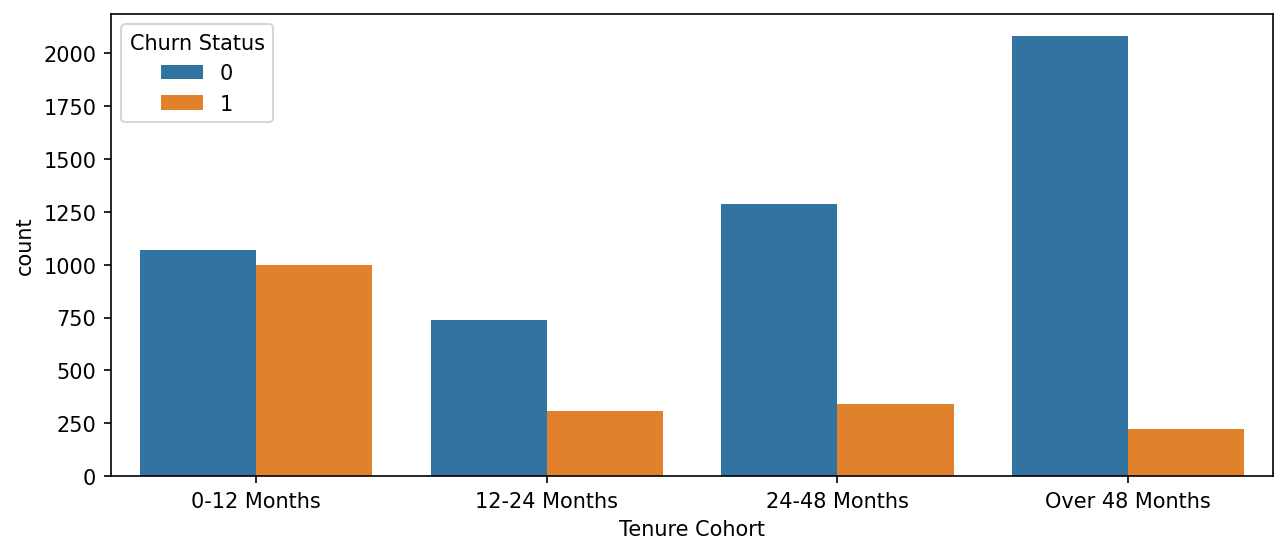

In [40]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn Status')

##### Customers who stay for more than 48 months are less likely to churn.
##### Customers with only 0-48 months of service are most likely to churn.

### Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and coloured by the Churn hue

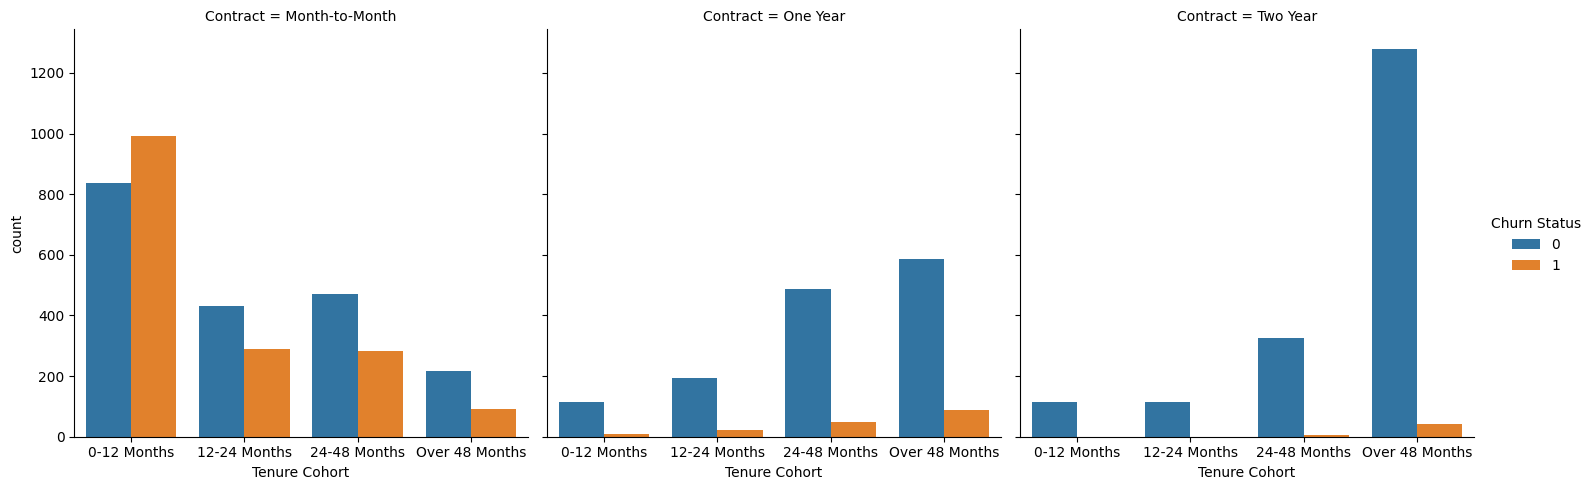

In [41]:
sns.catplot(data=df, x='Tenure Cohort', col='Contract', hue='Churn Status',kind='count');

### Multivariate Analysis
##### Lets create a heatmap to visualize the correlation between all numerical columns in the dataset. This can help us identify any strong positive or negative correlations between different features.

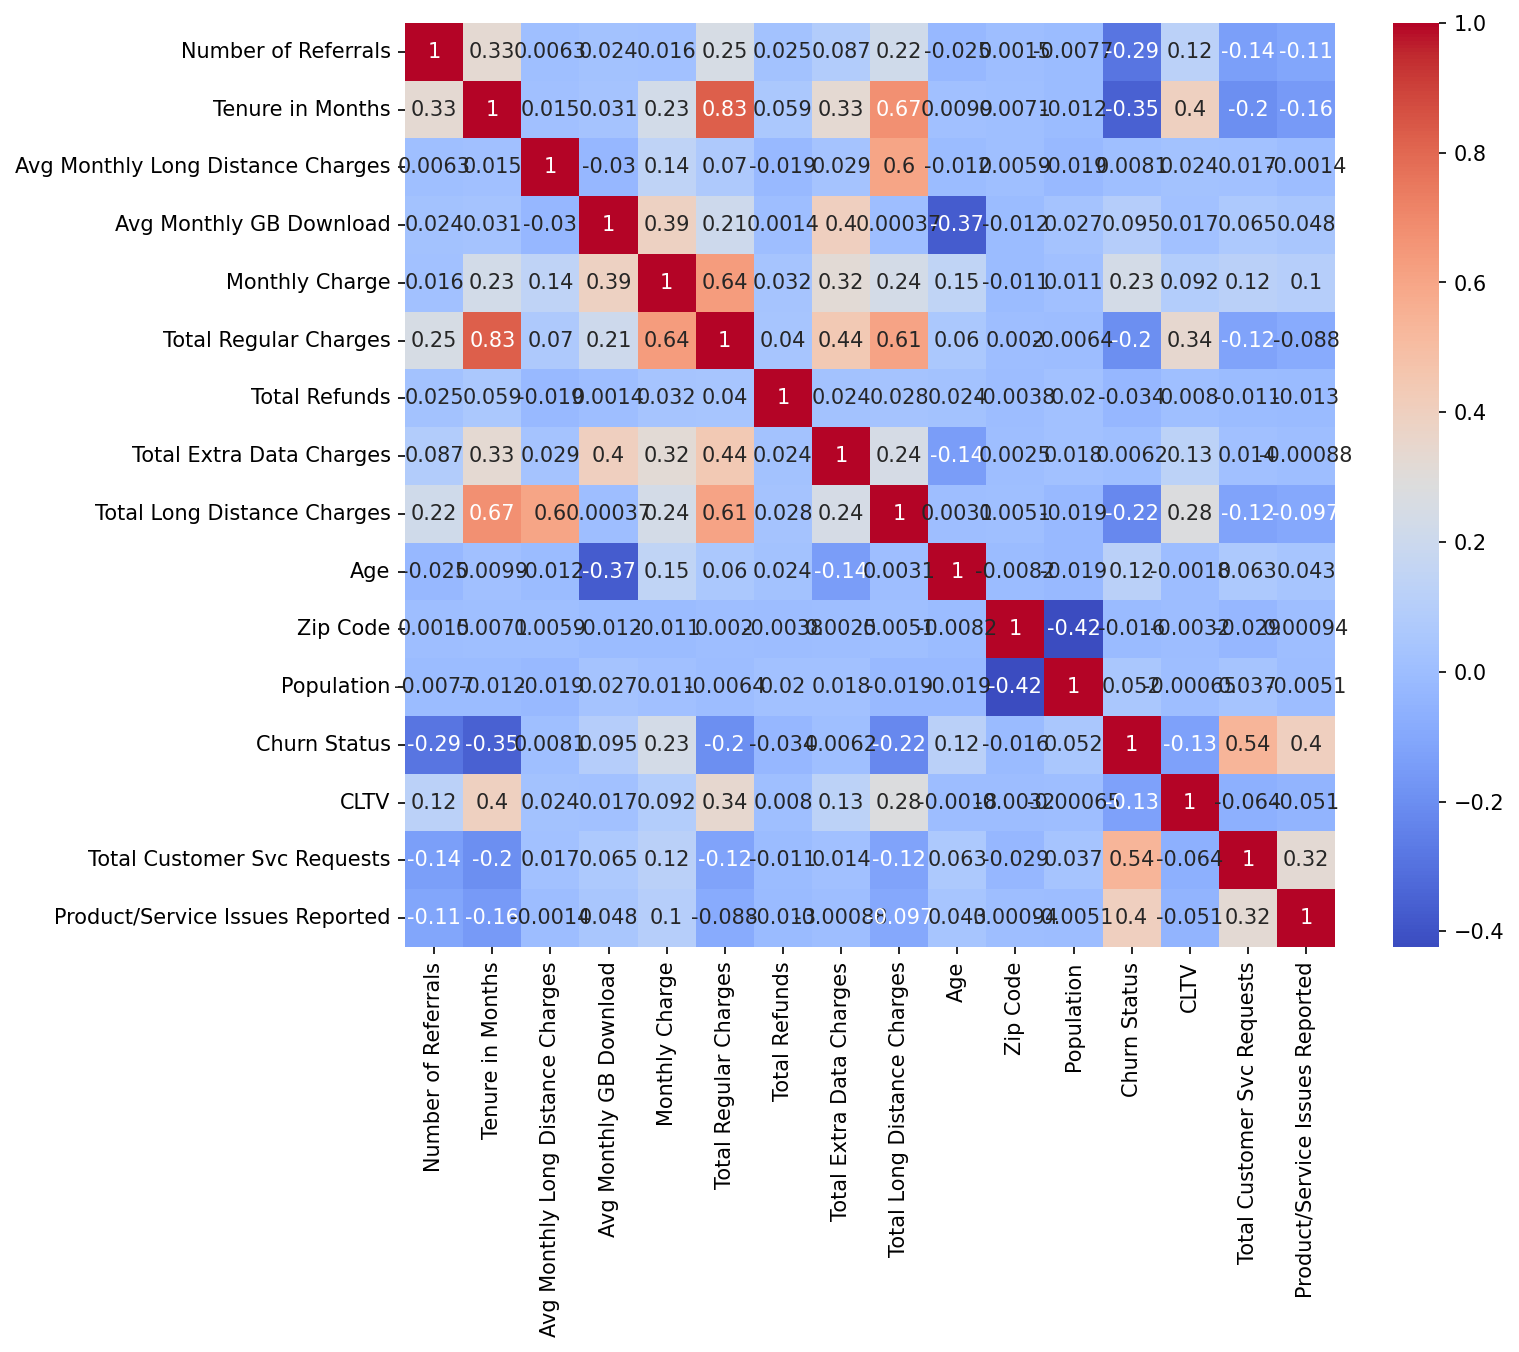

In [42]:
plt.figure(figsize=(10,8),dpi=150)
# Create correlation matrix
corr = df.corr(numeric_only=True)
# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');

### Step4-Feature Selection

In [43]:
df1=df.copy()
df1.shape

(7043, 44)

In [44]:
df1.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Zip Code',
       'Population', 'Churn Status', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate', 'Tenure Cohort'],
      dtype='object')

In [45]:
df2=df1.drop(['Customer ID','Number of Referrals', 'Offer', 'Total Refunds','Total Extra Data Charges','Age','Under 30','City', 'Zip Code',
              'Population','CLTV','Churn Category', 'Churn Reason','Total Customer Svc Requests', 'Product/Service Issues Reported', 
              'Customer Satisfaction rate', 'Tenure Cohort','Avg Monthly Long Distance Charges','Avg Monthly GB Download',
              'Total Long Distance Charges','Gender' ],axis=1)
print(df2.shape)
print(df2.columns)

(7043, 23)
Index(['Referred a Friend', 'Tenure in Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Senior Citizen', 'Married', 'Dependents', 'Churn Status'],
      dtype='object')


### Step5-Encoding Categorical Data

In [46]:
df2_categorical_columns = df2.select_dtypes(include=['object']).columns
print(df2_categorical_columns)

Index(['Referred a Friend', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Senior Citizen', 'Married',
       'Dependents'],
      dtype='object')


In [47]:
import sklearn
from sklearn.preprocessing import LabelEncoder
# Initialize a label encoder
label_encoder = LabelEncoder()

for column in df2_categorical_columns:
    df2[column] = label_encoder.fit_transform(df2[column])
df2

Referred a Friend  Tenure in Months  Phone Service  Multiple Lines  \
0                     0                 1              0               0   
1                     1                 8              1               1   
2                     0                18              1               1   
3                     1                25              1               0   
4                     1                37              1               1   
...                 ...               ...            ...             ...   
7038                  0                72              1               0   
7039                  1                24              1               1   
7040                  1                72              1               1   
7041                  1                11              0               0   
7042                  0                66              1               0   

      Internet Service  Internet Type  Online Security  Online Backup  \
0                    1              2                0              0   
1                    1              0                0              1   
2                    1              2                0              0   
3                    1              2                0              1   
4                    1              0                0              0   
...                ...            ...              ...            ...   
7038                 0              3                0              0   
7039                 1              1                1              0   
7040                 1              0                0              1   
7041                 1              1                1              0   
7042                 1              2                1              0   

      Device Protection Plan  Premium Tech Support  ...  Unlimited Data  \
0                          1                     0  ...               0   
1                          0                     0  ...               0   
2                          0                     0  ...               1   
3                          1                     0  ...               0   
4                          0                     0  ...               0   
...                      ...                   ...  ...             ...   
7038                       0                     0  ...               0   
7039                       1                     1  ...               1   
7040                       1                     0  ...               0   
7041                       0                     0  ...               1   
7042                       1                     1  ...               1   

      Contract  Paperless Billing  Payment Method  Monthly Charge  \
0            0                  1               0          41.236   
1            0                  1               1          83.876   
2            0                  1               0          99.268   
3            0                  1               0         102.440   
4            0                  1               0          79.560   
...        ...                ...             ...             ...   
7038         2                  1               0          21.150   
7039         1                  1               2          84.800   
7040         1                  1               1         103.200   
7041         0                  1               0          29.600   
7042         2                  1               0         105.650   

      Total Regular Charges  Senior Citizen  Married  Dependents  Churn Status  
0                     39.65               1        0           0             1  
1                    633.30               1        1           1             1  
2                   1752.55               1        0           1             1  
3                   2514.50               1        1           1             1  
4                   2868.15               1        1           1             1  


### Step6-Splitting the dataset

In [48]:
from sklearn.model_selection import train_test_split

x = df2.drop(['Churn Status'], axis=1)  
y = df2['Churn Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [49]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train:  (5634, 22)
Shape of x_test:  (1409, 22)
Shape of y_train:  (5634,)
Shape of y_test: (1409,)


### Step7-Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on the training data
scaler.fit(x_train)

# Apply the scaler transform to both the training and testing sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Step8-Mechine Learning Model

### LOGISTIC REGRESION

In [51]:
from sklearn.linear_model import LogisticRegression

#creating logistic regression model
logistic_model = LogisticRegression()
print(logistic_model)

#training
logistic_model.fit(x_train_scaled, y_train)

# prediction
logistic_pred=logistic_model.predict(x_test_scaled)

logistic_model.score(x_test_scaled,y_test)

LogisticRegression()


0.8502484031227822

####  evaluate model

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Accuracy:", logistic_accuracy)

# Print a classification report
print(classification_report(y_test,logistic_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,logistic_pred))

Accuracy: 0.8502484031227822
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1036
           1       0.74      0.66      0.70       373

    accuracy                           0.85      1409
   macro avg       0.81      0.79      0.80      1409
weighted avg       0.85      0.85      0.85      1409

Confusion Matrix:
[[950  86]
 [125 248]]


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
LRmse = mean_squared_error(y_test, logistic_pred)
LRrmse = np.sqrt(LRmse)
LRmae = mean_absolute_error(y_test, logistic_pred)
LRr_squared = r2_score(y_test, logistic_pred)

print("Mean Squared Error (MSE):", LRmse)
print("Root Mean Squared Error (RMSE):", LRrmse)
print("Mean Absolute Error (MAE):", LRmae)
print("R-squared (coefficient of determination):", LRr_squared)

Mean Squared Error (MSE): 0.1497515968772179
Root Mean Squared Error (RMSE): 0.3869775146920269
Mean Absolute Error (MAE): 0.1497515968772179
R-squared (coefficient of determination): 0.23064840021944588


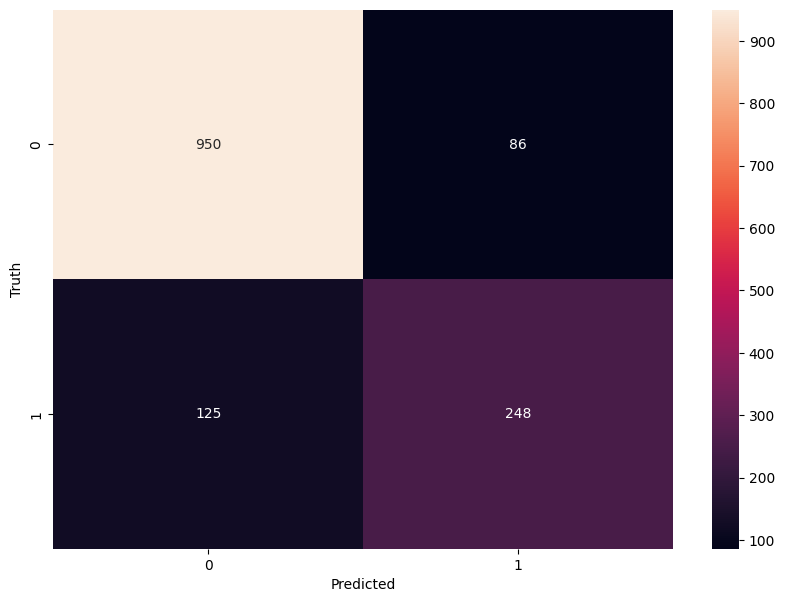

In [54]:
confusion_matrix = confusion_matrix(y_test, logistic_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True,fmt='d')    # 'd' stands for decimal format
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


### DECISION TREE

In [55]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a Decision Tree classifier
DT_model= DecisionTreeClassifier()
print(DT_model)

# Fit the model to the training data
DT_model.fit(x_train_scaled, y_train)

# Make predictions on the test data
DT_pred = DT_model.predict(x_test_scaled)

DT_model.score(x_test_scaled,y_test)

DecisionTreeClassifier()


0.8090844570617459

### evaluate model

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
DT_accuracy = accuracy_score(y_test, DT_pred)
print("Accuracy:", DT_accuracy)

# Print a classification report
print(classification_report(y_test,DT_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,DT_pred))

Accuracy: 0.8090844570617459
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1036
           1       0.64      0.65      0.64       373

    accuracy                           0.81      1409
   macro avg       0.75      0.76      0.76      1409
weighted avg       0.81      0.81      0.81      1409

Confusion Matrix:
[[897 139]
 [130 243]]


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
DTmse = mean_squared_error(y_test, DT_pred)
DTrmse = np.sqrt(DTmse)
DTmae = mean_absolute_error(y_test, DT_pred)
DTr_squared = r2_score(y_test, DT_pred)

print("Mean Squared Error (MSE):", DTmse)
print("Root Mean Squared Error (RMSE):", DTrmse)
print("Mean Absolute Error (MAE):", DTmae)
print("R-squared (coefficient of determination):", DTr_squared)

Mean Squared Error (MSE): 0.19091554293825408
Root Mean Squared Error (RMSE): 0.4369388320328763
Mean Absolute Error (MAE): 0.19091554293825408
R-squared (coefficient of determination): 0.019167865682611196


Text(95.72222222222221, 0.5, 'Truth')

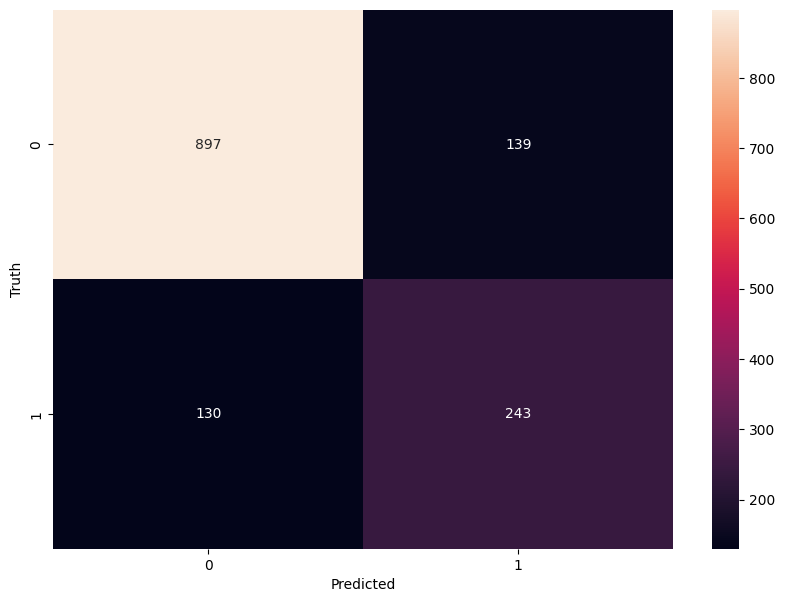

In [58]:
confusion_matrix1 = confusion_matrix(y_test, DT_pred)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix1, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100)  # You can adjust the number of estimators as needed
print(RF_model)

# Fit the model to the training data
RF_model.fit(x_train_scaled, y_train)

# Make predictions on the test data
RF_pred = RF_model.predict(x_test_scaled)


RF_model.score(x_test_scaled,y_test)


RandomForestClassifier()


0.8608942512420156

#### evaluate model

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
RF_accuracy = accuracy_score(y_test, RF_pred)
print("Accuracy:", RF_accuracy)

# Print a classification report
print(classification_report(y_test,RF_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,RF_pred))

Accuracy: 0.8608942512420156
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1036
           1       0.78      0.66      0.72       373

    accuracy                           0.86      1409
   macro avg       0.83      0.80      0.81      1409
weighted avg       0.86      0.86      0.86      1409

Confusion Matrix:
[[967  69]
 [127 246]]


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
RFmse = mean_squared_error(y_test, RF_pred)
RFrmse = np.sqrt(RFmse)
RFmae = mean_absolute_error(y_test, RF_pred)
RFr_squared = r2_score(y_test, RF_pred)

print("Mean Squared Error (MSE):", RFmse)
print("Root Mean Squared Error (RMSE):", RFrmse)
print("Mean Absolute Error (MAE):", RFmae)
print("R-squared (coefficient of determination):", RFr_squared)

Mean Squared Error (MSE): 0.1391057487579844
Root Mean Squared Error (RMSE): 0.37296883081295734
Mean Absolute Error (MAE): 0.1391057487579844
R-squared (coefficient of determination): 0.28534164191000666


Text(95.72222222222221, 0.5, 'Truth')

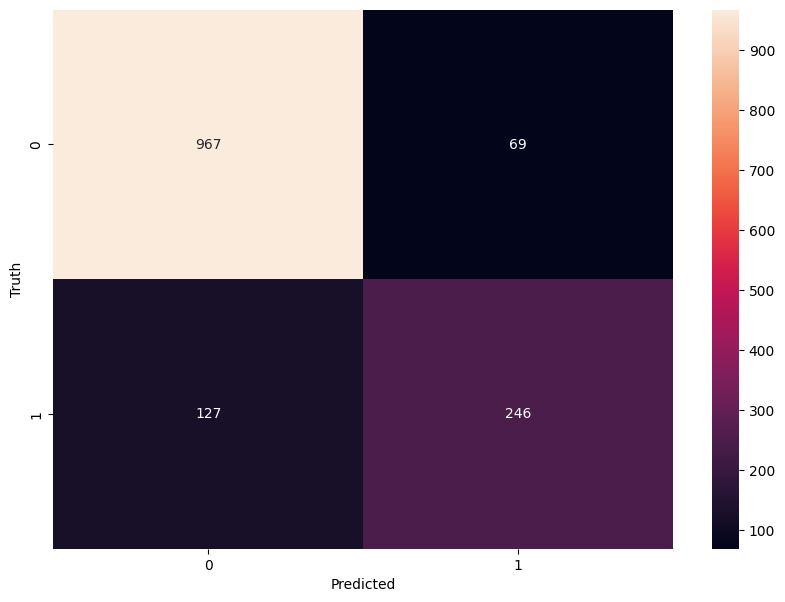

In [62]:
confusion_matrix2 = confusion_matrix(y_test, RF_pred)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix2, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### SVC (SUPPORT VECTOR CLASSIFIER)

In [63]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(kernel='linear')  # You can choose different kernel functions (linear, rbf, etc.)
print(svm_model)

# Fit the model to the training data
svm_model.fit(x_train_scaled, y_train)

# Make predictions on the test data
svm_pred = svm_model.predict(x_test_scaled)


svm_model.score(x_test_scaled,y_test)


SVC(kernel='linear')


0.8488289567068843

### evaluate model

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_accuracy= accuracy_score(y_test, svm_pred)
print("Accuracy:", svm_accuracy)

# Print a classification report
print(classification_report(y_test,svm_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,svm_pred))

Accuracy: 0.8488289567068843
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1036
           1       0.74      0.67      0.70       373

    accuracy                           0.85      1409
   macro avg       0.81      0.79      0.80      1409
weighted avg       0.85      0.85      0.85      1409

Confusion Matrix:
[[946  90]
 [123 250]]


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
svmmse = mean_squared_error(y_test, svm_pred)
svmrmse = np.sqrt(svmmse)
svmmae = mean_absolute_error(y_test, svm_pred)
svmr_squared = r2_score(y_test, svm_pred)

print("Mean Squared Error (MSE):", svmmse)
print("Root Mean Squared Error (RMSE):", svmrmse)
print("Mean Absolute Error (MAE):", svmmae)
print("R-squared (coefficient of determination):", svmr_squared)

Mean Squared Error (MSE): 0.15117104329311568
Root Mean Squared Error (RMSE): 0.38880720581429
Mean Absolute Error (MAE): 0.15117104329311568
R-squared (coefficient of determination): 0.22335596799403779


Text(95.72222222222221, 0.5, 'Truth')

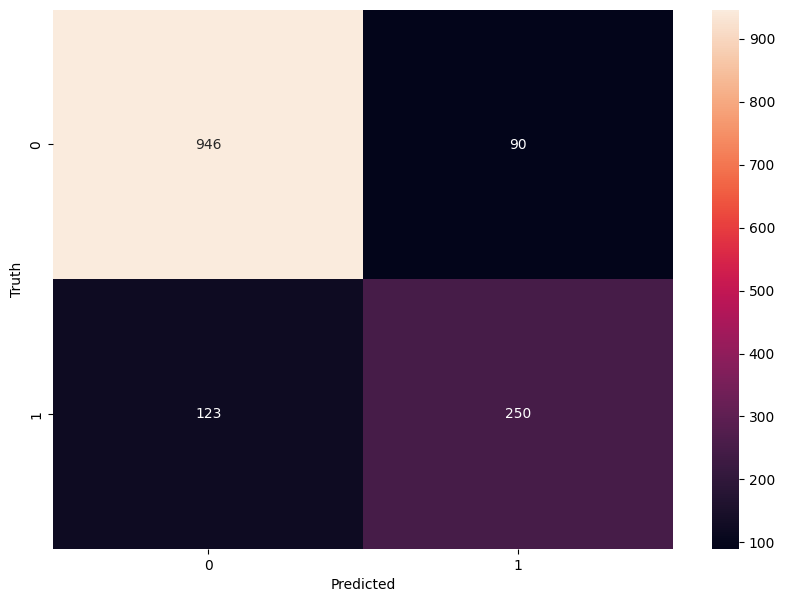

In [66]:
confusion_matrix3 = confusion_matrix(y_test, svm_pred)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix3, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Conclusion:
##### The F1 score ranges from 0 to 1, where a higher value indicates better performance.Based on the F1 scores, we can make the following observations:
##### Overall, based on the F1 scores, the  Random Forest model seems to be the most effective in predicting churn among the four models evaluated. However, it is important to note that other evaluation metrics and considerations should also be taken into account when selecting the best model for a specific task or business objective.
##### The accuracy of random forest is 86%. 


In [67]:
# Print a classification report
print(classification_report(y_test,RF_pred))
print(confusion_matrix(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1036
           1       0.78      0.66      0.72       373

    accuracy                           0.86      1409
   macro avg       0.83      0.80      0.81      1409
weighted avg       0.86      0.86      0.86      1409

[[967  69]
 [127 246]]


##### From the confusion matrix we can see that: There are total 973+63=1036 actual non-churn values and the algorithm predicts 973 of them as non churn and 63 of them as churn. While there are 127+246=373 actual churn values and the algorithm predicts 127 of them as non churn values and 246 of them as churn values.

##

Precision: Precision represents the ability of the model to correctly identify positive instances. In other words, it measures the accuracy of the positive predictions.

Recall: Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances out of all actual positive instances.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. It considers both precision and recall and is particularly useful when the classes are imbalanced. The F1-score ranges between 0 and 1, with 1 being the best score.

Support: Support represents the number of samples of each class in the evaluation set. It gives an indication of the distribution of classes in the dataset.

Accuracy: Accuracy is the overall correctness of the model's predictions, considering both true positives and true negatives. It is the ratio of correctly predicted instances to the total number of instances.

Macro Average: The macro average calculates the metrics independently for each class and then takes the average. It treats all classes equally, regardless of their distribution in the dataset. It can be useful when the classes are imbalanced.

Weighted Average: The weighted average calculates the metrics weighted by the support of each class. It takes into account the distribution of classes and provides an overall measure of the model's performance.